Model: RandomForestClassifier
Accuracy: 0.7083
Precision: 0.5990
AUC-ROC: 0.7596
MAE: 0.2917
MSE: 0.2917
RMSE: 0.5401
MAPE: 591234310886564.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       397
           1       0.60      0.55      0.57       220

    accuracy                           0.71       617
   macro avg       0.68      0.67      0.68       617
weighted avg       0.70      0.71      0.71       617



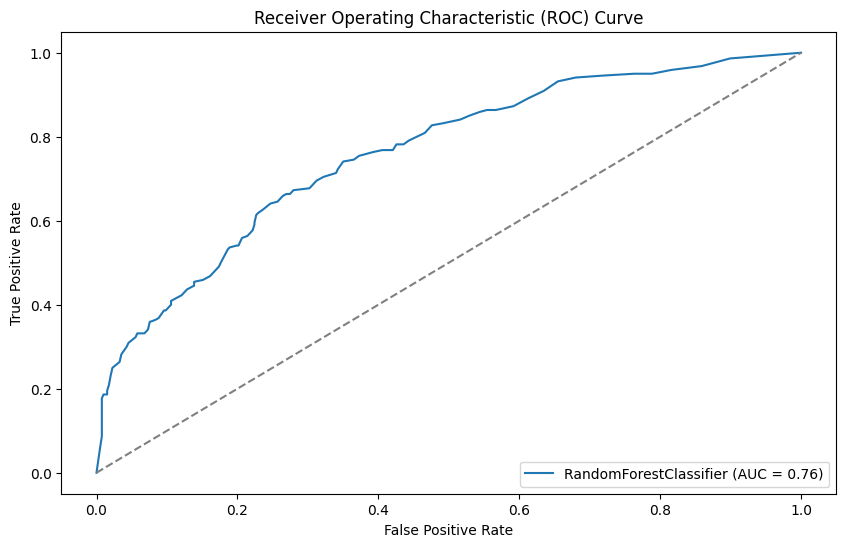

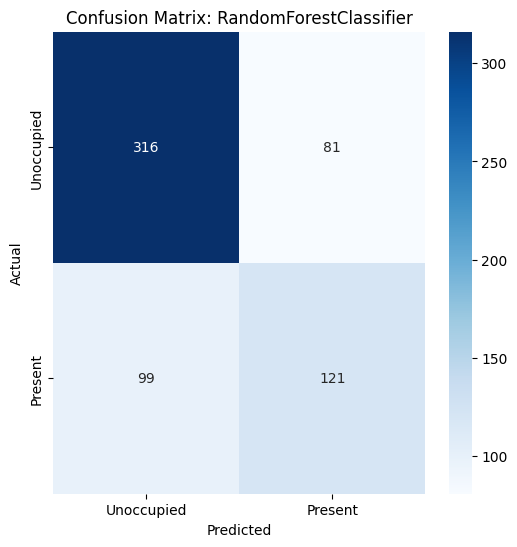

Model: LogisticRegression
Accuracy: 0.7131
Precision: 0.7048
AUC-ROC: 0.6609
MAE: 0.2869
MSE: 0.2869
RMSE: 0.5356
MAPE: 226274859722018.6562
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.81       397
           1       0.70      0.34      0.46       220

    accuracy                           0.71       617
   macro avg       0.71      0.63      0.63       617
weighted avg       0.71      0.71      0.68       617



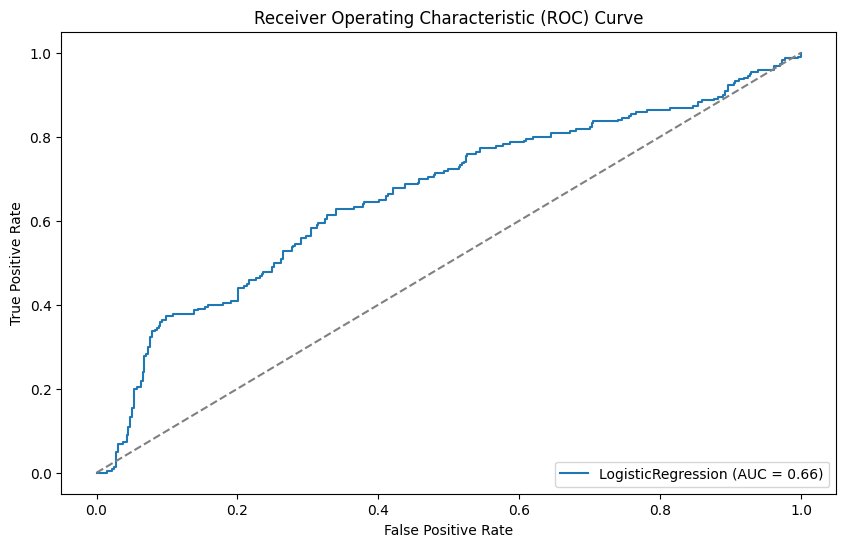

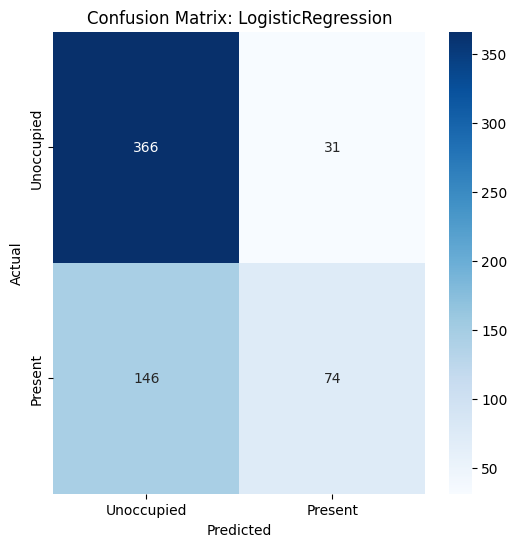

Model: SVC
Accuracy: 0.7358
Precision: 0.7436
AUC-ROC: 0.7184
MAE: 0.2642
MSE: 0.2642
RMSE: 0.5140
MAPE: 218975670698727.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       397
           1       0.74      0.40      0.52       220

    accuracy                           0.74       617
   macro avg       0.74      0.66      0.67       617
weighted avg       0.74      0.74      0.71       617



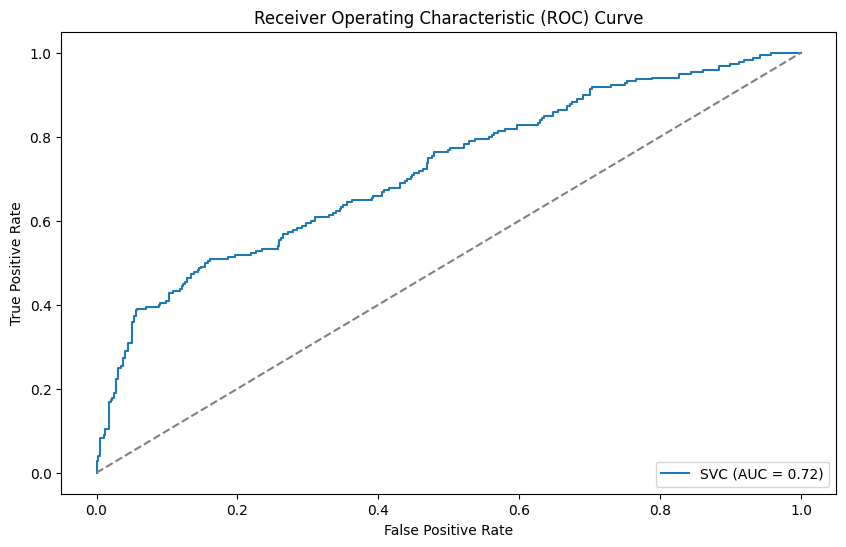

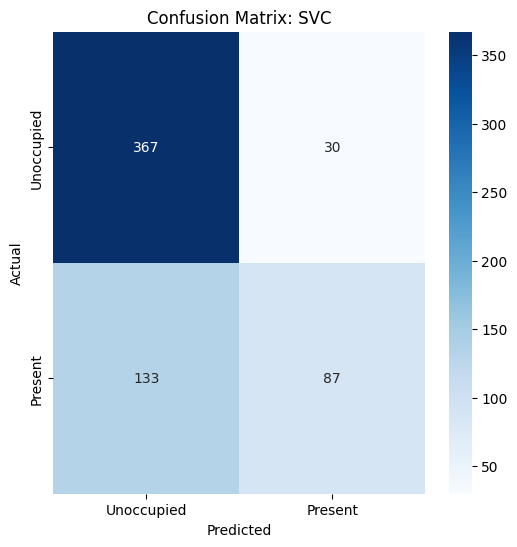

Model: DecisionTreeClassifier
Accuracy: 0.7002
Precision: 0.5792
AUC-ROC: 0.6738
MAE: 0.2998
MSE: 0.2998
RMSE: 0.5476
MAPE: 678824579166055.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       397
           1       0.58      0.58      0.58       220

    accuracy                           0.70       617
   macro avg       0.67      0.67      0.67       617
weighted avg       0.70      0.70      0.70       617



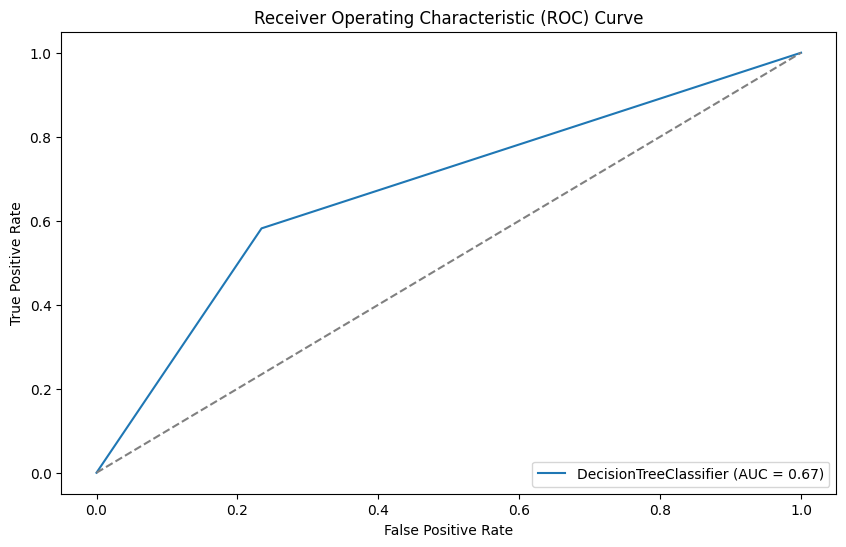

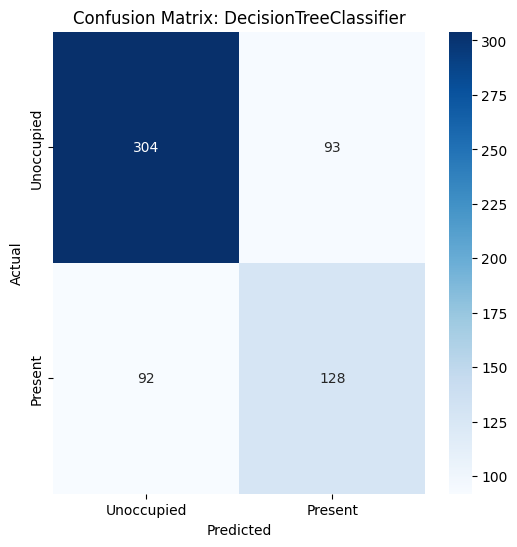

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, classification_report
from sklearn.metrics import confusion_matrix
from math import sqrt

# Load the dataset
file_path = r"C:\Users\billj\Downloads\on-street-parking-bay-sensors.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Convert date columns to datetime
data['Lastupdated'] = pd.to_datetime(data['Lastupdated'])
data['Status_Timestamp'] = pd.to_datetime(data['Status_Timestamp'])

# Handle missing values
data.isnull().sum()  # Check for missing values
data = data.dropna()  # Drop rows with missing values (or use imputation)

# Feature Engineering
data['hour'] = data['Status_Timestamp'].dt.hour
data['day_of_week'] = data['Status_Timestamp'].dt.dayofweek
data['month'] = data['Status_Timestamp'].dt.month

# Convert categorical features like 'Status_Description' to numeric labels
label_encoder = LabelEncoder()
data['Status_Description'] = label_encoder.fit_transform(data['Status_Description'])

# Extract geospatial features (latitude, longitude)
data[['latitude', 'longitude']] = data['Location'].str.split(',', expand=True)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

# Feature scaling for machine learning models
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['hour', 'day_of_week', 'month', 'latitude', 'longitude']])

# Define target and features
X = pd.DataFrame(scaled_features, columns=['hour', 'day_of_week', 'month', 'latitude', 'longitude'])
y = data['Status_Description']  # Target is the parking status (0: Unoccupied, 1: Present)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define function to evaluate the models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    # Print results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC Curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unoccupied', 'Present'], yticklabels=['Unoccupied', 'Present'])
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Model Implementations
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    SVC(probability=True, random_state=42),
    DecisionTreeClassifier(random_state=42)
]

# Evaluate each model
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)
